# Law of large numbers and ergodic averages

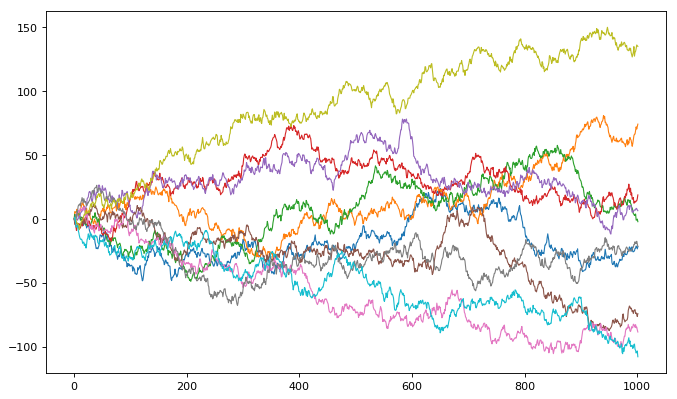

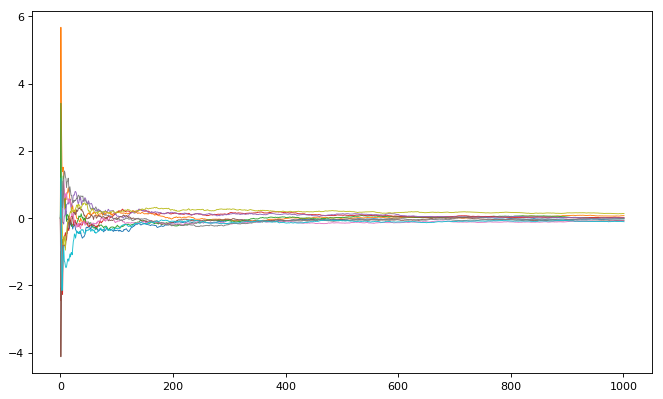

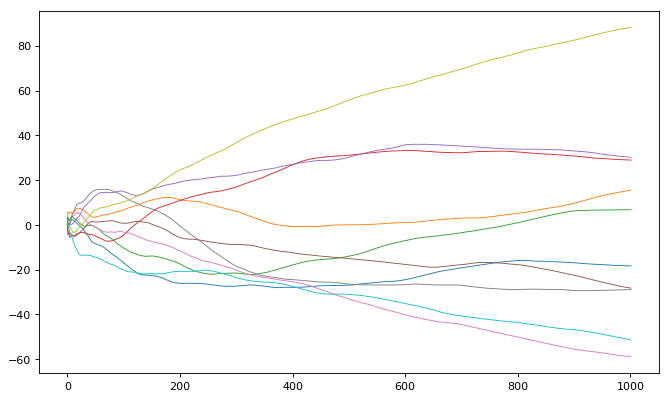

In [9]:
# Simulation of a Markov chain that arises as the Euler-Maryuama approximation for the solution of 
# the SDE  dX_t = -gamma X_t dt + sigma dB_t; Computation of averages (LLN) and ergodic averages.

# For gamma=0, the Markov chain is a random walk with normally distributed increments.
# In this case, the avaerages converge by the LLN but the ergodic averages diverge.

# For gamma in (0,2), the Markov chain has a drift to the origin. 
# In this case there exists an equilibrium distribution and the ergodic averages converge.

import numpy as np 
# makes numpy routines and data types available as np.[name ouf routine or data type]

import matplotlib.pyplot as plt 
# makes plotting command available as plt.[name of command]

x0 = 0.
# initial value at time t=0 
sigma = 2.
# volatility
gamma = 0
# friction coefficient

burnin = 1
# the number of steps at the beginning that are not taken into account for ergodic averages

equilibriumsteps = 1000
# the number of steps that are taken into account for ergodic averages

steps = burnin + equilibriumsteps
# produce simulation with this number of steps


h = 1
# stepsize for each step of the corresponding Brownian motion
std = np.sqrt(h)
# standard deviation for the distribution of each step

k = 10
# number of samples that will be simulated

noise = np.random.randn(steps,k)*std
# create a steps times k dimensional matrix of normal random numbers with variance h 


sde = np.ones((steps+1,k))
sde = sde*x0
    
ergodicaverage = np.zeros((steps+1,k))
average = np.zeros((steps+1,k))

for n in range(burnin):
    sde[n+1] = sde[n]-gamma*h*sde[n]+sigma*noise[n]
    
ergodicaverage[burnin] = sde[burnin]
average[burnin] = sde[burnin]/burnin

for n in range(burnin,steps):
    sde[n+1] = sde[n]-gamma*h*sde[n]+sigma*noise[n]
    
    ergodicaverage[n+1] = ((n+1-burnin)*ergodicaverage[n]+sde[n+1])/(n+2-burnin)
    average[n+1] = sde[n+1]/(n+1)

t = np.arange(0,steps+1,1)*h
# creates vector of time points

plt.figure(figsize=(10,6), dpi=80)
# sets size of plot
plt.plot(t,sde,linewidth=1.0)
# produces a plot of the sample solutions in the components of sde 
# versus t with thin lines
plt.show()
# output of plot 

plt.figure(figsize=(10,6), dpi=80)
# sets size of plot
plt.plot(t,average,linewidth=0.8)
# produces a plot of the sample solutions in the components of sde 
# versus t with thin lines
plt.show()
# output of plot 

plt.figure(figsize=(10,6), dpi=80)
# sets size of plot
plt.plot(t,ergodicaverage,linewidth=0.8)
# produces a plot of the sample solutions in the components of sde 
# versus t with thin lines
plt.show()
# output of plot 
    
   